In [1]:
!pip install GEOparse

     |████████████████████████████████| 286kB 7.7MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.2-cp36-none-any.whl size=28847 sha256=5680530d243827fae2dec6f6ab08dc063c8c42e6b25c2226687471aa44d6a0c6
  Stored in directory: /root/.cache/pip/wheels/84/6e/b8/b6497c4f50bde2c3b3f195a470e1bc894312407656896dd6bc
Successfully built GEOparse


In [2]:
import GEOparse
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelBinarizer, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
sns.set()

In [ ]:
gds = GEOparse.get_GEO(geo='GDS2771')

17-Nov-2020 12:42:13 DEBUG utils - Directory ./ already exists. Skipping.
17-Nov-2020 12:42:13 INFO GEOparse - File already exist: using local version.
17-Nov-2020 12:42:13 INFO GEOparse - Parsing ./GDS2771.soft.gz: 
17-Nov-2020 12:42:13 DEBUG GEOparse - DATABASE: Geo
17-Nov-2020 12:42:13 DEBUG GEOparse - DATASET: GDS2771
17-Nov-2020 12:42:13 DEBUG GEOparse - SUBSET: GDS2771_1
17-Nov-2020 12:42:13 DEBUG GEOparse - SUBSET: GDS2771_2
17-Nov-2020 12:42:13 DEBUG GEOparse - SUBSET: GDS2771_3
17-Nov-2020 12:42:13 DEBUG GEOparse - DATASET: GDS2771


In [ ]:
lung_labels = list()

lung_labels_ = gds.columns['disease state'].to_numpy()

for label in lung_labels_:
  if 'no cancer' in label:
    lung_labels.append(0)
  elif 'cancer' in label:
    lung_labels.append(1)

lung_labels = np.array(lung_labels).astype(np.float32)

print( 'number of samples belonging to class 0 = {}, and class 1 = {}'.format(len(lung_labels[lung_labels == 0])
, len(lung_labels[lung_labels == 1])) )

number of samples belonging to class 0 = 90, and class 1 = 102


In [ ]:
lung_pd = gds.table.dropna(axis=0)

lung_cancer_np = lung_pd.drop(columns=['ID_REF', 'IDENTIFIER']).transpose().to_numpy().astype(np.float32)

lung_cancer_np

In [ ]:
# save data

np.save( os.path.join( datasets_path, 'lung_cancer.npy' ), lung_cancer_np )
np.save( os.path.join( datasets_path, 'lung_cancer_labels.npy' ), lung_labels )

In [ ]:
# load Colon Cancer Data

gds_colon = GEOparse.get_GEO('GDS3268')

14-Dec-2020 11:03:16 DEBUG utils - Directory ./ already exists. Skipping.
14-Dec-2020 11:03:16 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/datasets/GDS3nnn/GDS3268/soft/GDS3268.soft.gz to ./GDS3268.soft.gz
100%|██████████| 25.5M/25.5M [00:01<00:00, 16.7MB/s]
14-Dec-2020 11:03:19 DEBUG downloader - Size validation passed
14-Dec-2020 11:03:19 DEBUG downloader - Moving /tmp/tmp07jz3hzo to /content/GDS3268.soft.gz
14-Dec-2020 11:03:19 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/datasets/GDS3nnn/GDS3268/soft/GDS3268.soft.gz
14-Dec-2020 11:03:19 INFO GEOparse - Parsing ./GDS3268.soft.gz: 
14-Dec-2020 11:03:19 DEBUG GEOparse - DATABASE: Geo
14-Dec-2020 11:03:19 DEBUG GEOparse - DATASET: GDS3268
14-Dec-2020 11:03:19 DEBUG GEOparse - SUBSET: GDS3268_1
14-Dec-2020 11:03:19 DEBUG GEOparse - SUBSET: GDS3268_2
14-Dec-2020 11:03:19 DEBUG GEOparse - SUBSET: GDS3268_3
14-Dec-2020 11:03:19 DEBUG GEOparse - SUBSET: GDS3268_4
14-Dec-2020 11:03:19 DEBUG GEOpars

In [ ]:
colon_df = gds_colon.table

colon_cancer_np_ = colon_df.drop(columns=['ID_REF', 'IDENTIFIER']).transpose().dropna(axis=1).to_numpy()

colon_cancer_desc_ = gds_colon.columns['description'].to_numpy()

print( colon_cancer_np_.shape )

(202, 30954)


In [ ]:
# where disease type is either Normal or UC

labels = list()

for desc in colon_cancer_desc_:

  if 'Normal' in desc:
    labels.append(0)
  else:
    labels.append(1)

colon_cancer_labels_ = np.array(labels, dtype=np.int8)

print( np.bincount(colon_cancer_labels_) )

[ 73 129]


In [ ]:
prostate_gds_ = GEOparse.get_GEO('GDS2545')

15-Nov-2020 22:48:56 DEBUG utils - Directory ./ already exists. Skipping.
15-Nov-2020 22:48:56 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/datasets/GDS2nnn/GDS2545/soft/GDS2545.soft.gz to ./GDS2545.soft.gz
100%|██████████| 4.23M/4.23M [00:01<00:00, 2.83MB/s]
15-Nov-2020 22:48:58 DEBUG downloader - Size validation passed
15-Nov-2020 22:48:58 DEBUG downloader - Moving /tmp/tmp_9__g8gu to /content/GDS2545.soft.gz
15-Nov-2020 22:48:58 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/datasets/GDS2nnn/GDS2545/soft/GDS2545.soft.gz
15-Nov-2020 22:48:58 INFO GEOparse - Parsing ./GDS2545.soft.gz: 
15-Nov-2020 22:48:58 DEBUG GEOparse - DATABASE: Geo
15-Nov-2020 22:48:58 DEBUG GEOparse - DATASET: GDS2545
15-Nov-2020 22:48:58 DEBUG GEOparse - SUBSET: GDS2545_1
15-Nov-2020 22:48:58 DEBUG GEOparse - SUBSET: GDS2545_2
15-Nov-2020 22:48:58 DEBUG GEOparse - SUBSET: GDS2545_3
15-Nov-2020 22:48:58 DEBUG GEOparse - SUBSET: GDS2545_4
15-Nov-2020 22:48:58 DEBUG GEOpars

In [ ]:
prostate_labels_ = gds.columns['tissue'].to_numpy()

prostate_labels_

In [ ]:
prostate_pd = gds.table.dropna(axis=0)

prostate_cancer_np = prostate_pd.drop(columns=['ID_REF', 'IDENTIFIER']).transpose().to_numpy()
print(prostate_cancer_np.shape)

(171, 12558)


In [ ]:
leukaemia_gds = GEOparse.get_GEO('GDS2118')

leukaemia_pd = leukaemia_gds.table.dropna(axis=0)

leukaemia_np = leukaemia_pd.drop(columns=['ID_REF', 'IDENTIFIER']).transpose().to_numpy()

print( leukaemia_np.shape )

15-Nov-2020 23:40:31 DEBUG utils - Directory ./ already exists. Skipping.
15-Nov-2020 23:40:31 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/datasets/GDS2nnn/GDS2118/soft/GDS2118.soft.gz to ./GDS2118.soft.gz
100%|██████████| 8.42M/8.42M [00:01<00:00, 8.06MB/s]
15-Nov-2020 23:40:33 DEBUG downloader - Size validation passed
15-Nov-2020 23:40:33 DEBUG downloader - Moving /tmp/tmp8caxdwy6 to /content/GDS2118.soft.gz
15-Nov-2020 23:40:33 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/datasets/GDS2nnn/GDS2118/soft/GDS2118.soft.gz
15-Nov-2020 23:40:33 INFO GEOparse - Parsing ./GDS2118.soft.gz: 
15-Nov-2020 23:40:33 DEBUG GEOparse - DATABASE: Geo
15-Nov-2020 23:40:33 DEBUG GEOparse - DATASET: GDS2118
15-Nov-2020 23:40:33 DEBUG GEOparse - SUBSET: GDS2118_1
15-Nov-2020 23:40:33 DEBUG GEOparse - SUBSET: GDS2118_2
15-Nov-2020 23:40:33 DEBUG GEOparse - SUBSET: GDS2118_3
15-Nov-2020 23:40:33 DEBUG GEOparse - SUBSET: GDS2118_4
15-Nov-2020 23:40:33 DEBUG GEOpars

(66, 54675)


In [ ]:
leukaemia_gds.columns['description']

In [ ]:
leukaemia_labels_ = leukaemia_gds.columns['disease state'].to_numpy()

leukaemia_labels_

In [ ]:
# MNIST Dataset

(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28*28).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

print(train_images.shape)

(60000, 784)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# path to drive
datasets_path = os.path.join('drive', 'My Drive', 'Lab 2')

Mounted at /content/drive


<h1>Load Lung Cancer Dataset</h1>

In [5]:
lung_cancer_samples = np.load( os.path.join( datasets_path, 'lung_cancer.npy' ) )
lung_cancer_labels = np.load( os.path.join( datasets_path, 'lung_cancer_labels.npy' ) ).astype(np.int32)

## Load Breast Cancer Dataset

In [45]:
breast_cancer_samples = np.load( os.path.join( datasets_path, 'breastcancer-samples.npy' ) ).astype( np.float32 )
breast_cancer_labels = np.load( os.path.join( datasets_path, 'breastcancer-labels.npy' ) ).astype( np.int32 )

## Load Colon Cancer Dataset

In [207]:
colon_cancer_samples = np.load( os.path.join( datasets_path, 'coloncancer-samples.npy' ) ).astype( np.float32 )
colon_cancer_labels = np.load( os.path.join( datasets_path, 'coloncancer-labels.npy' ) ).astype( np.int32 )

In [5]:
# Load bank dataset

bank_samples = np.load( os.path.join( datasets_path, 'bank-data-samples.npy' ) ).astype(np.float32)
bank_labels = np.load( os.path.join( datasets_path, 'bank-data-labels.npy' ) ).astype(np.int32)

if len( bank_labels.shape ) > 1:
  bank_labels = np.squeeze( bank_labels, axis=-1 )

In [6]:
def preprocess_dataset( samples, labels ):

  scaler = MinMaxScaler()

  std = np.std( samples )

  normalized_samples = scaler.fit_transform(samples)

  positive_samples = normalized_samples[labels == 1]
  negative_samples = normalized_samples[labels == 0]

  print( len(positive_samples), ', ', len(negative_samples) )

  print('{:.2f}, {:.2f}'.format(np.min(normalized_samples), np.max(normalized_samples)))

  return normalized_samples, scaler

In [7]:
normalized_samples, min_max_scaler = preprocess_dataset(bank_samples, bank_labels)

5289 ,  39922
0.00, 1.00


In [8]:
def get_one_hot_encoding(indices, depth):

  return tf.one_hot(indices, depth)

In [9]:
def get_input_with_labels(samples, one_hot_labels):

  return tf.concat([samples, one_hot_labels], axis=1)

In [25]:
# create dataset of batches

def get_batches(buffer_size, batch_size, samples, labels):

  return tf.data.Dataset.from_tensor_slices((samples, labels)).shuffle(buffer_size).batch(batch_size)

In [26]:
# transform the input data into batches --->

BUFFER_SIZE = normalized_samples.shape[0]
BATCH_SIZE = 128

dataset = get_batches(BUFFER_SIZE, BATCH_SIZE, normalized_samples, bank_labels)

In [27]:
noise_dim = 100
n_classes = 2
gen_input_dim = noise_dim + n_classes
output_shape = normalized_samples.shape[1]
disc_input_dim = output_shape + n_classes

In [57]:
# range of features

feature_min = np.expand_dims( np.min(lung_cancer_samples, axis=0), axis=0 )
feature_max = np.expand_dims( np.max(lung_cancer_samples, axis=0), axis=0 )

In [65]:
# MG-GAN

def mg_generator(gen_input):

  # We have one input layer 
  # TODO --- Define the shape of the input
  
  input_layer_1 = tf.keras.layers.Input(shape=(gen_input,))
  input_layer_2 = tf.keras.layers.Input(shape=(gen_input,))
  input_layer_3 = tf.keras.layers.Input(shape=(gen_input,))

  merged = tf.keras.layers.Concatenate(axis=1)([input_layer_1, input_layer_2, input_layer_3])

  dense1 = tf.keras.layers.Dense(128, use_bias=False)(merged)
  batch_norm1 = tf.keras.layers.BatchNormalization()(dense1)
  leaky_relu_1 = tf.keras.layers.LeakyReLU()(batch_norm1)

  dense2 = tf.keras.layers.Dense(128, use_bias=False)(leaky_relu_1)
  batch_norm2 = tf.keras.layers.BatchNormalization()(dense2)
  leaky_relu_2 = tf.keras.layers.LeakyReLU()(batch_norm2)

  dense3 = tf.keras.layers.Dense(128, use_bias=False)(leaky_relu_2)
  batch_norm3 = tf.keras.layers.BatchNormalization()(dense3)
  leaky_relu_3 = tf.keras.layers.LeakyReLU()(batch_norm3)

  output = tf.keras.layers.Dense(22215, use_bias=False, activation='sigmoid')(leaky_relu_3)

  g = tf.keras.Model(inputs=[input_layer_1,input_layer_2, input_layer_3], outputs=[output])

  return g

In [ ]:
generator = mg_generator(gen_input=gen_input_dim)

generator.summary()

In [68]:
# Basic GAN

def generator_model(gen_input_dim, output_shape,hidden_units=128):

  model = tf.keras.Sequential([
                               
      tf.keras.layers.Dense(hidden_units, input_shape = (gen_input_dim,), use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Dense(hidden_units * 2, use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Dense(hidden_units * 4, use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Dense(output_shape,use_bias=False, activation='sigmoid'),
  ])
      
  return model

In [117]:
generator = generator_model( gen_input_dim, output_shape,hidden_units=32 )

generator.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 32)                3264      
_________________________________________________________________
batch_normalization_35 (Batc (None, 32)                128       
_________________________________________________________________
leaky_re_lu_65 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 64)                2048      
_________________________________________________________________
batch_normalization_36 (Batc (None, 64)                256       
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 128)             

In [ ]:
noise = tf.random.normal([1, noise_dim])

gen_test_input = get_input_with_labels(noise, np.array([[1,0]]))

generated_sample = generator(gen_test_input, training= False)

# plt.imshow(generated_sample[0, :, :, 0], cmap='gray')

In [97]:
def discriminator_model(disc_input_dim, hidden_units=128):

  model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(disc_input_dim,)),

    tf.keras.layers.Dense(hidden_units * 4),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(hidden_units * 2),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(hidden_units),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1)
  ])

  return model

In [118]:
discriminator = discriminator_model(disc_input_dim,hidden_units=32)

discriminator.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 128)               2432      
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 128)               0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 32)              

In [ ]:
disc_input = get_input_with_labels(generated_sample, np.array([[1,0]]))

discriminator( disc_input )

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6234483]], dtype=float32)>

<h1>Binary Cross entropy loss</h1>

In [107]:
# Binary Crossentropy Loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Mean Squared Error
mean_Squared_err = tf.keras.losses.MeanSquaredError()

In [108]:
def generator_loss(fake_output, real_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)
  # return mean_Squared_err(fake_output, real_output)

In [109]:
def discriminator_loss(fake_output, real_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [110]:
generator_optimizer = tf.keras.optimizers.Adam( 1e-5 )
discriminator_optimizer = tf.keras.optimizers.Adam( 1e-5 )

In [116]:
# Number of epochs

EPOCHS = 20

In [ ]:
def draw_digits(model, epoch, noise):

  predictions = model(noise, training=False)

  num_samples = predictions.shape[0]

  plt.figure(figsize=(7,7))
  for i in range(num_samples):

    plt.subplot(num_samples/4, num_samples/4, i+1)
    plt.imshow(predictions[i,:,:,0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [119]:
# BCE GAN
@tf.function
def train_step(samples, one_hot_labels):
    
    batch_size = min(samples.shape[0], BATCH_SIZE)
    disc_loss = 0
    gen_loss = 0

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      
      noise = tf.random.normal([batch_size, noise_dim])

      gen_input = get_input_with_labels(noise, one_hot_labels)
      # gen_input_1 = get_input_with_labels(noise, one_hot_labels)
      # gen_input_2 = get_input_with_labels(feature_min, one_hot_labels)
      # gen_input_3 = get_input_with_labels(feature_max, one_hot_labels)

      generated_samples = generator( gen_input, training=True)
      # generated_samples = generator( [gen_input_1, gen_input_2, gen_input_3], training=True)

      real_input = get_input_with_labels(samples, one_hot_labels)
      fake_input = get_input_with_labels(generated_samples, one_hot_labels)

      real_output = discriminator(real_input, training=True)
      fake_output = discriminator(fake_input, training=True)

      gen_loss = generator_loss( fake_output, real_output )
      disc_loss = discriminator_loss( fake_output, real_output )

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [120]:
def train(dataset, epochs):

  gen_losses = []
  disc_losses = []

  for epoch in range(epochs):
    
    gen_loss_step = []
    disc_loss_step = []
    #disc_fake_loss_step = []
    #disc_real_loss_step = []

    # if  epoch == 0 or (epoch + 1) % 50 == 0 :

    print( 'training GAN - epoch ----> ', epoch+1)

    # Save the model every 500 epochs
    #if (epoch + 1) % 500 == 0:
    #  checkpoint.save(file_prefix = checkpoint_prefix)

    for batch, batch_labels in dataset:

      # if epoch == 0 or (epoch + 1) % 50 == 0:
        
      gen_loss,crit_loss = train_step(batch, get_one_hot_encoding(batch_labels, depth=2))

      gen_loss_step.append(gen_loss)
      disc_loss_step.append(crit_loss)

      # else:
      # train_step(batch, get_one_hot_encoding(batch_labels, depth=2))

    # if  epoch == 0 or (epoch + 1) % 50 == 0 :

    gen_losses.append( np.average(gen_loss_step) )
    disc_losses.append( np.average(disc_loss_step) )

    print('generator loss: {:.3f}, discriminator loss: {:.3f}'.format(
        np.average(gen_loss_step),
        np.average(disc_loss_step)
    ))

  return gen_losses, disc_losses

In [121]:
genlosses, disc_losses = train(dataset, EPOCHS)

training GAN - epoch ---->  1
generator loss: 0.807, discriminator loss: 1.238
training GAN - epoch ---->  2
generator loss: 1.004, discriminator loss: 1.010
training GAN - epoch ---->  3
generator loss: 1.162, discriminator loss: 0.872
training GAN - epoch ---->  4
generator loss: 1.280, discriminator loss: 0.813
training GAN - epoch ---->  5
generator loss: 1.316, discriminator loss: 0.822
training GAN - epoch ---->  6
generator loss: 1.285, discriminator loss: 0.877
training GAN - epoch ---->  7
generator loss: 1.227, discriminator loss: 0.946
training GAN - epoch ---->  8
generator loss: 1.171, discriminator loss: 1.001
training GAN - epoch ---->  9
generator loss: 1.125, discriminator loss: 1.039
training GAN - epoch ---->  10
generator loss: 1.086, discriminator loss: 1.076
training GAN - epoch ---->  11
generator loss: 1.054, discriminator loss: 1.107
training GAN - epoch ---->  12
generator loss: 1.020, discriminator loss: 1.142
training GAN - epoch ---->  13
generator loss: 0.

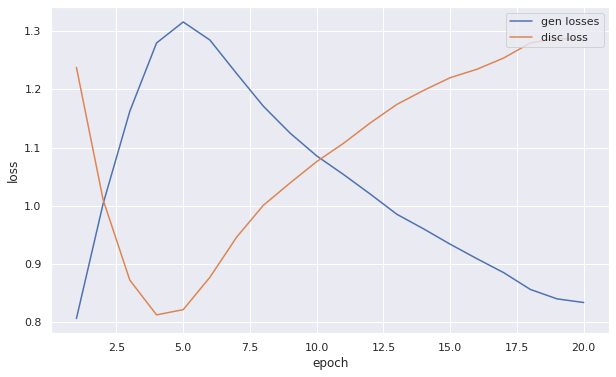

In [122]:
# x_ticks = [x * 50 for x in list(range(EPOCHS // 50 +1))]
x_ticks = list(range(1, EPOCHS + 1))
plt.figure(figsize=(10,6))
plt.plot(x_ticks,genlosses)
plt.plot(x_ticks,disc_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['gen losses','disc loss'], loc='upper right')
plt.savefig('generator loss - discriminator loss - bank cancer - {} epochs.png'.format(EPOCHS))
plt.show()

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
_loss_dict = [{'epoch':epoch+1,'generator loss':loss} for epoch,loss in enumerate(genlosses)]

In [ ]:
for epoch in range( len(_loss_dict) ):
  _loss_dict[epoch]['disc loss'] = disc_losses[epoch]

In [ ]:
with open('gen_disc_loss_1.csv', 'w') as file:
  csv_writer = csv.DictWriter(file,fieldnames=['epoch', 'generator loss','disc loss'])
  csv_writer.writeheader()
  csv_writer.writerows(_loss_dict)

In [123]:
def generate_samples(model, num_examples_to_generate, Class):

  labels = np.array([])

  if Class == 1:
    labels = np.ones(num_examples_to_generate)
  elif Class == 0:
    labels = np.zeros(num_examples_to_generate)

  seed = tf.random.normal([num_examples_to_generate,noise_dim])

  one_hot_encoded_labels = get_one_hot_encoding(labels, depth=2)

  gen_input = get_input_with_labels(seed, one_hot_encoded_labels)
  # gen_input_2 = get_input_with_labels(random_samples, one_hot_encoded_labels)

  # model is refering generator
  synthetic_samples = model( gen_input, training = False)

  return synthetic_samples, labels, one_hot_encoded_labels

In [124]:
# load x_train, y_train, x_test, y_test

x_train = np.load( os.path.join(datasets_path, 'bank-data_x_train.npy') )
y_train = np.load( os.path.join(datasets_path, 'bank-data_y_train.npy') )
x_test = np.load( os.path.join(datasets_path, 'bank-data_x_test.npy') )
y_test = np.load( os.path.join(datasets_path, 'bank-data_y_test.npy') )

print( 'Class 0 = {}, Class 1 = {}'.format( len( y_train[y_train==0] ), len(y_train[y_train==1]) ) )

Class 0 = 31923, Class 1 = 4245


In [ ]:
from numpy.random import default_rng

def get_random_samples(dataset, number_of_samples):

  rng = default_rng()
  indices = rng.choice(len(dataset) - 1, size=number_of_samples, replace=False)

  # shuffled_ds = tf.random.shuffle(dataset)

  random_samples = list()

  for ind in indices:

    random_samples.append(dataset[ind])

  return np.array( random_samples )

In [125]:
synthetic_samples_1,synthetic_labels_1, one_hot_encoded_labels = generate_samples(
    generator,
   num_examples_to_generate=27680, Class=1)

synthetic_samples_0,synthetic_labels_0, one_hot_encoded_labels = generate_samples(
    generator,
   num_examples_to_generate=2, Class=0)

synthetic_samples = np.concatenate((synthetic_samples_0, synthetic_samples_1), axis=0)
synthetic_labels = np.concatenate((synthetic_labels_0, synthetic_labels_1))
print(synthetic_samples_0.shape, synthetic_labels_0.shape)
print(synthetic_samples_1.shape, synthetic_labels_1.shape)

(2, 16) (2,)
(27680, 16) (27680,)


In [126]:
# inverse scaling
synthetic_samples_origin = min_max_scaler.inverse_transform( synthetic_samples )

In [127]:
augmented_x_train = np.concatenate(( x_train, synthetic_samples_origin), axis=0)
augmented_y_train = np.concatenate(( y_train, synthetic_labels ), axis=0)

In [128]:
print('# of samples belonging to class 1: {}, and class 0: {}'.format(
    len(augmented_y_train[augmented_y_train == 1]),
    len(augmented_y_train[augmented_y_train == 0]))
)

# of samples belonging to class 1: 31925, and class 0: 31925


In [129]:
# Standardize the data

standard_scaler = StandardScaler()

standard_scaler.fit( augmented_x_train )

x_train_scaled = standard_scaler.transform( augmented_x_train )
x_test_scaled = standard_scaler.transform( x_test )

In [130]:
skfold = StratifiedKFold( n_splits=5 )

lr = LogisticRegressionCV( cv=skfold, max_iter=3000 )

lr.fit( x_train_scaled, augmented_y_train )

LogisticRegressionCV(Cs=10, class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=3000, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [132]:
# Decision Tree Classifier

params = { 'max_depth': list(range( 5, 31 )) + [None] }

decision_tree = DecisionTreeClassifier()

gridSearchCV = GridSearchCV(estimator=decision_tree ,param_grid={}, cv=skfold )

gridSearchCV.fit( x_train_scaled, augmented_y_train )

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None, param

In [134]:
# K-Nearest Neighbors

knn = KNeighborsClassifier()

params = { 'n_neighbors': list( range( 5, 16 ) ) }

gridSearchCV = GridSearchCV(estimator=knn, param_grid=params, cv=skfold)

gridSearchCV.fit( x_train_scaled, augmented_y_train )

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [135]:
# scores ----> accuracy, recall, precision, roc_auc, confusion matrix

best_estimator_ = gridSearchCV.best_estimator_

y_pred = best_estimator_.predict( x_test_scaled )

# recall
print( 'recall = {}'.format( recall_score(y_test, y_pred) ) )

# precision
print( 'precision = {}'.format( precision_score(y_test, y_pred) ) )

# accuracy
print( 'accuracy = {}'.format( accuracy_score( y_test, y_pred ) ) )

# roc_auc
print( 'roc_auc = {}'.format( roc_auc_score( y_test, y_pred ) ) )

# confusion matrix
print( confusion_matrix(y_test, y_pred) )

recall = 0.27586206896551724
precision = 0.6114649681528662
accuracy = 0.8961627778392126
roc_auc = 0.6264921046165254
[[7816  183]
 [ 756  288]]


In [ ]:
# Support Vector Machine

svc = SVC()

svc.fit(augmented_x_train, augmented_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)